<a href="https://colab.research.google.com/github/YishaZukhrufin/PCVK/blob/main/week09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama : Yisha Zukhrufin A**

**Kelas : TI-3A**

**Nim : 2141720013**

**Modul 9 - Morfologi**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt



*   Fungsi Dilasi dengan Structuring Element Dilasi (SED) 3 X 3 tanpa menggunakan library morphology dari
openCV.



In [5]:
def dilasi_citra(F, w):
  height, width = F.shape

  image_copy = np.zeros((height, width), dtype=np.uint8)

  # generate structure element
  structure_element = np.ones((w,w), dtype=np.uint8)
  constant = (w - 1) // 2

  # melakukan proses dilasi
  for i in range(constant, height - constant):
    for j in range(constant, width - constant):
      temp = F[i-constant:i+constant+1,j-constant:j+constant+1]
      product = temp * structure_element
      image_copy[i,j]= np.max(product)

  return image_copy

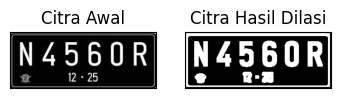

In [6]:
image = cv.imread('/content/drive/MyDrive/PCVK/images/plat nomer.jpg', 0)

w = 5
ret, thresh = cv.threshold(image , 125, 200, cv.THRESH_BINARY)
image_copy = dilasi_citra(thresh, w)

plt.subplot(131),plt.imshow(image, cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(image_copy, cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()



*   implementasi operasi dilasi Structuring Element Dilasi (SED)
berbentuk cross 3 x 3 dengan menggunakan library morphology dari openCV



[[1 1 1]
 [1 1 1]
 [1 1 1]]


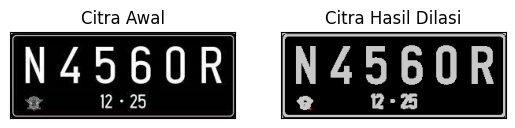

In [7]:
image = cv.imread('/content/drive/MyDrive/PCVK/images/plat nomer.jpg')

ret, thresh = cv.threshold(image , 125, 200, cv.THRESH_BINARY)
kernel = np.ones((3,3), np.uint16)
dilasi = cv.dilate(thresh, kernel, iterations = 1)
print(kernel)

plt.subplot(121), plt.imshow(image), plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(dilasi), plt.title('Citra Hasil Dilasi')
plt.xticks([]), plt.yticks([])
plt.show()



*   Fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element
Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari
openCV



In [8]:
def erosi_citra(F, k):
  height, width = F.shape

  structural_erosi = np.ones((k,k), dtype=np.uint8)
  constant = (k - 1) // 2

  image_copy = np.zeros((height, width), dtype=np.uint8)
  for i in range(constant, height - constant):
    for j in range(constant, width - constant):
      temp = F[i-constant:i+constant+1,j-constant:j+constant+1]
      product = temp * structural_erosi
      image_copy[i,j] = np.min(product)

  return image_copy

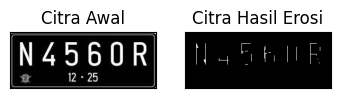

In [9]:
image = cv.imread('/content/drive/MyDrive/PCVK/images/plat nomer.jpg', 0)

k = 5
ret, thresh = cv.threshold(image, 175, 225, cv.THRESH_BINARY)
image_copy = erosi_citra(thresh, k)

plt.subplot(131), plt.imshow(image, cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(image_copy, cmap = 'gray')
plt.title('Citra Hasil Erosi'),plt.xticks([]), plt.yticks([])
plt.show()



*   Implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk
square 5 x 5 dengan menggunakan library morphology dari openCV



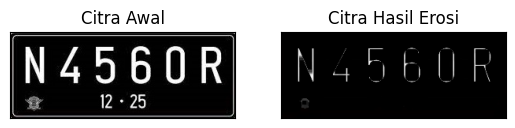

In [11]:
image = cv.imread('/content/drive/MyDrive/PCVK/images/plat nomer.jpg')
kernel = np.ones((5,5), np.uint8)
erosion = cv.erode(image, kernel,iterations = 1)

plt.subplot(121),plt.imshow(image),plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(erosion), plt.title('Citra Hasil Erosi')
plt.xticks([]), plt.yticks([])
plt.show()



*    implementasi operasi opening dengan Structuring Element
berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari
openCV,





1.  *Operasi Opening Menggunakan tanpa Library Morphology*



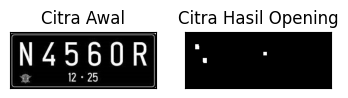

In [12]:
image = cv.imread('/content/drive/MyDrive/PCVK/images/plat nomer.jpg', 0)

k = 7
reto, thresh = cv.threshold(image, 127, 225, cv.THRESH_BINARY)
image_result = dilasi_citra(erosi_citra(thresh,k),k)

plt.subplot(131), plt.imshow(image,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(image_result, cmap = 'gray')
plt.title('Citra Hasil Opening'), plt.xticks([]), plt.yticks([])
plt.show()

2. *Operasi Opening Menggunakan Library Morphology*

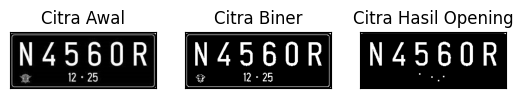

In [13]:
#Dengan Menggunakan Library
img = cv.imread('/content/drive/MyDrive/PCVK/images/plat nomer.jpg', 0)
ret, thresh = cv.threshold(img, 127, 225, cv.THRESH_BINARY)
kernel = np.ones((3,3),np.uint8)
openn = cv.morphologyEx(thresh,cv.MORPH_OPEN, kernel)

plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(thresh,cmap = 'gray')
plt.title('Citra Biner'), plt.xticks([]), plt.yticks([])

plt.subplot(133),plt.imshow(openn,cmap = 'gray')
plt.title('Citra Hasil Opening'), plt.xticks([]), plt.yticks([])

plt.show()



*    Implementasi operasi closing dengan Structuring Element berbentuk
square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV




1.   *Operasi closing tanpa library morphology*



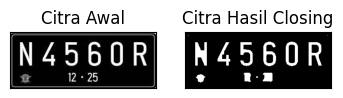

In [14]:
image = cv.imread('/content/drive/MyDrive/PCVK/images/plat nomer.jpg', 0)

k = 7
retc, threshc = cv.threshold(image, 127, 225, cv.THRESH_BINARY)
image_copy = erosi_citra(dilasi_citra(threshc,k),k)

plt.subplot(131),plt.imshow(image,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(image_copy,cmap = 'gray')
plt.title('Citra Hasil Closing'), plt.xticks([]), plt.yticks([])

plt.show()



2.   *Operasi closing dengan library morphology*



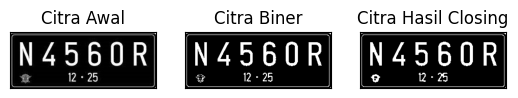

In [15]:
image = cv.imread('/content/drive/MyDrive/PCVK/images/plat nomer.jpg', 0)
ret, thresh = cv.threshold(image, 127, 225, cv.THRESH_BINARY)
kernel = np.ones((3,3),np.uint8)
image_result = cv.morphologyEx(thresh,cv.MORPH_CLOSE, kernel)

plt.subplot(131),plt.imshow(image,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(thresh,cmap = 'gray')

plt.title('Citra Biner'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(image_result,cmap = 'gray')
plt.title('Citra Hasil Closing'), plt.xticks([]), plt.yticks([])

plt.show()



*  Implementasi operasi dilasi dengan Structuring Element berbentuk
Cross 3 x 3 dan 5 x 5





1.   *Cross 3*



In [16]:
def dilasi_citra(F,w):
  p,q = F.shape

  imgD= np.zeros((p,q), dtype=np.uint8)
  SED= np.ones((w,w), dtype=np.uint8)
  SED = np.array([[0, 1, 0],
  [1, 1, 1],
  [0, 1, 0]], dtype = np.uint8)
  constant1 = (w-1)//2

  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
      temp= F[i-constant1:i+constant1+1, j- constant1:j+constant1+1]
      product= temp*SED
      imgD[i,j]= np.max(product)

  return imgD

print('SED = Cross 3')

SED = Cross 3


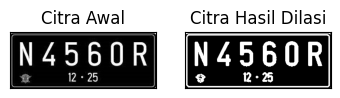

In [17]:
img_d = cv.imread('/content/drive/MyDrive/PCVK/images/plat nomer.jpg', 0)

w = 3
ret, thresh = cv.threshold(img_d, 127, 225, cv.THRESH_BINARY)
imgD = dilasi_citra(thresh,w)

plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])

plt.show()


2.   *Cross 5*



In [19]:
def dilasi_citra(F,w):
  p,q= F.shape

  imgD= np.zeros((p,q), dtype=np.uint8)
  SED= np.ones((w,w), dtype=np.uint8)
  SED = np.array([
      [0, 0, 1, 0, 0],
      [0, 0, 1, 0, 0],
      [1, 1, 1, 1, 1],
      [0, 0, 1, 0, 0],
      [0, 0, 1, 0, 0]], dtype = np.uint8)

  constant1= (w-1)//2

  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
      temp= F[i-constant1:i+constant1+1, j-
      constant1:j+constant1+1]
      product= temp*SED
      imgD[i,j]= np.max(product)

  return imgD
  print('SED = Cross 5')

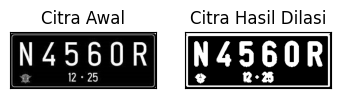

In [20]:
img_d= cv.imread('/content/drive/MyDrive/PCVK/images/plat nomer.jpg', 0)

w = 5
ret, thresh = cv.threshold(img_d, 127, 225, cv.THRESH_BINARY)
imgD = dilasi_citra(thresh,w)


plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])

plt.show()



*  Implementasi operasi dilasi dengan Structuring Element berbentuk
Circular 3 x 3 dan 5 x 5  





  *Circular 1 dan Circular 2*



SED = Circle 3


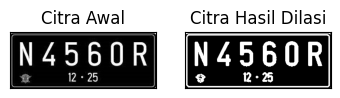

SED = Circle 5


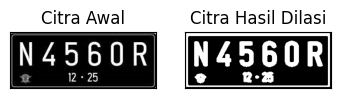

In [29]:
def dilasi_citra(F,w):
  #size image
  p,q= F.shape

  imgD= np.zeros((p,q), dtype=np.uint8)

  #Generate structure element dilasi (SED)
  SED= cv.getStructuringElement(cv.MORPH_ELLIPSE,(w,w))
  constant1= (w-1)//2

  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
      temp= F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product= temp*SED
      imgD[i,j]= np.max(product)
  return imgD

print('SED = Circle 3')
img_d= cv.imread('/content/drive/MyDrive/PCVK/images/plat nomer.jpg',0)
ret, thresh = cv.threshold(img_d, 127, 225,cv.THRESH_BINARY)
w=3
imgD = dilasi_citra(thresh,w)

plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]),
plt.yticks([])
plt.show()

print('SED = Circle 5')
img_d= cv.imread('/content/drive/MyDrive/PCVK/images/plat nomer.jpg',0)
ret, thresh = cv.threshold(img_d, 127, 225,cv.THRESH_BINARY)
w=5
imgD = dilasi_citra(thresh,w)

plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]),
plt.yticks([])
plt.show()



*   Implementasi operasi erosi dengan Structuring Element berbentuk
Rectangle 3 x 5 dan 5 x 7





1.   *Rectangle 3x5*



In [30]:
def erosi_citra(F,p,l):

  m,n= F.shape
  SE = cv.getStructuringElement(cv.MORPH_RECT,(p,l))
  constant1= (l-1)//2
  constant2= (p-1)//2

  imgE= np.zeros((m,n), dtype=np.uint8)

  for i in range(constant1, m-constant1):
    for j in range(constant2,n-constant2):
      temp= F[i-constant1:i+constant1+1, j-constant2:j+constant2+1]
      product= temp*SE
      imgE[i,j] = np.min(product)

  return imgE

SE = Rectangle 3x5


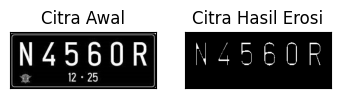

In [31]:
print('SE = Rectangle 3x5')

img_e= cv.imread('/content/drive/MyDrive/PCVK/images/plat nomer.jpg', 0)

p, l = 5, 3
ret1, thresh1 = cv.threshold(img_e, 127, 225, cv.THRESH_BINARY)
imgE = erosi_citra(thresh1,p,l)

plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])

plt.show()



2.   Rectangle 5x7



SE = Rectangle 5x7


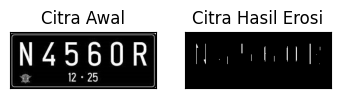

In [33]:
print('SE = Rectangle 5x7')
img_e = cv.imread('/content/drive/MyDrive/PCVK/images/plat nomer.jpg', 0)

l, p = 7, 5
ret1, thresh1 = cv.threshold(img_e, 127, 225, cv.THRESH_BINARY)
imgE = erosi_citra(thresh1,p,l)

plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])

plt.show()



*   Implementasi operasi erosi dengan Structuring Element berbentuk
Line Vertikal 3 dan 5





1.   *Line Vertikal 3*



In [34]:
def erosi_citra(F,k):
  m,n= F.shape

  SE = cv.getStructuringElement(cv.MORPH_ELLIPSE,(1,k))
  constant= (k-1)//2

  imgE= np.zeros((m,n), dtype=np.uint8)
  for i in range(constant, m-constant):
    for j in range(constant,n-constant):
      temp= F[i-constant:i+constant+1, j- constant:j+constant+1]
      product= temp*SE
      imgE[i,j]= np.min(product)

  return imgE

SE = Line Vertikal 3


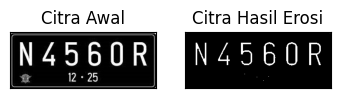

In [35]:
print('SE = Line Vertikal 3')

k = 3
img_e= cv.imread('/content/drive/MyDrive/PCVK/images/plat nomer.jpg', 0)
ret1, thresh1 = cv.threshold(img_e, 127, 225, cv.THRESH_BINARY)
imgE = erosi_citra(thresh1,k)

plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()



2.   *Line Vertikal 5*



SE = Line Vertikal 5


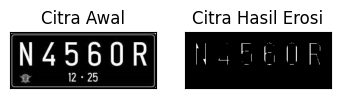

In [36]:
print('SE = Line Vertikal 5')
img_e= cv.imread('/content/drive/MyDrive/PCVK/images/plat nomer.jpg', 0)

k = 5
ret1, thresh1 = cv.threshold(img_e, 127, 225, cv.THRESH_BINARY)
imgE = erosi_citra(thresh1,k)

plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()




*   Top Hat




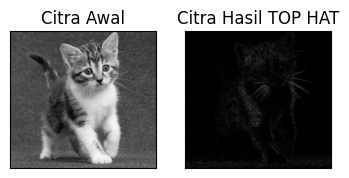

In [37]:
filterSize =(3, 3)
kernel = cv.getStructuringElement(cv.MORPH_RECT,
filterSize)

img = cv.imread('/content/drive/MyDrive/PCVK/images/kitten01.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
tophat_img = cv.morphologyEx(img, cv.MORPH_TOPHAT, kernel)

#cv2.imshow("original", input_image)
#cv2.imshow("tophat", tophat_img)
#cv2.waitKey(5000)

plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(tophat_img,cmap = 'gray')
plt.title('Citra Hasil TOP HAT'), plt.xticks([]), plt.yticks([])
plt.show()



*   Black Hat



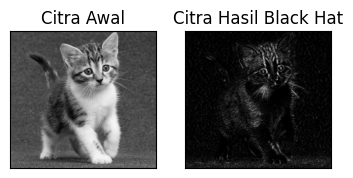

In [38]:
filterSize =(3, 3)
kernel = cv.getStructuringElement(cv.MORPH_RECT, filterSize)
img = cv.imread('/content/drive/MyDrive/PCVK/images/kitten01.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Applying the Black-Hat operation
#tophat_img = cv.morphologyEx(img,cv.MORPH_BLACKHAT, kernel)
Kernel = cv.getStructuringElement(cv.MORPH_RECT, (13, 5))
blackhat = cv.morphologyEx(img, cv.MORPH_BLACKHAT, Kernel)

#cv.imshow("original", input_image)
#cv.imshow("tophat", tophat_img)
#cv.waitKey(5000)

plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(blackhat,cmap = 'gray')
plt.title('Citra Hasil Black Hat'), plt.xticks([]), plt.yticks([])
plt.show()



*   Skeleton



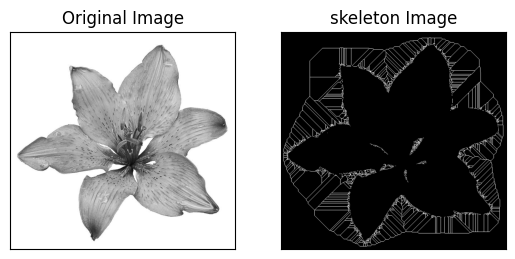

In [39]:
from skimage import filters
from skimage.morphology import skeletonize

img = cv.imread('/content/drive/MyDrive/PCVK/images/lily.jpg', 0)
binary = img > filters.threshold_triangle(img)
# true false to one
binary_cp = binary.copy()
binary_cp[binary_cp == True] = 1
binary_cp[binary_cp == False] = 0

# skeletonize image
skeleton = skeletonize(binary_cp)

# print images plt.figure(figsize=(20,20))

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(skeleton,cmap = 'gray')
plt.title('skeleton Image'), plt.xticks([]), plt.yticks([])

plt.savefig("binary and bin_skeleton.png")
plt.show()



*  Skeleton Inverse



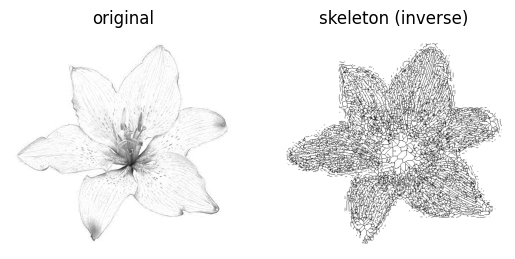

In [41]:
from skimage import io

img = io.imread('/content/drive/MyDrive/PCVK/images/lily.jpg')[..., 0]

binary = img < filters.threshold_triangle(img)
skeleton = skeletonize(binary)
fig, ax = plt.subplots(1, 2)

ax[0].imshow(img, cmap='gray')
ax[0].set_title('original')
ax[0].set_axis_off()

# note the reversed colormap, gray_r
ax[1].imshow(skeleton, cmap='gray_r')
ax[1].set_title('skeleton (inverse)')
ax[1].set_axis_off()

plt.show()



*    Thickening



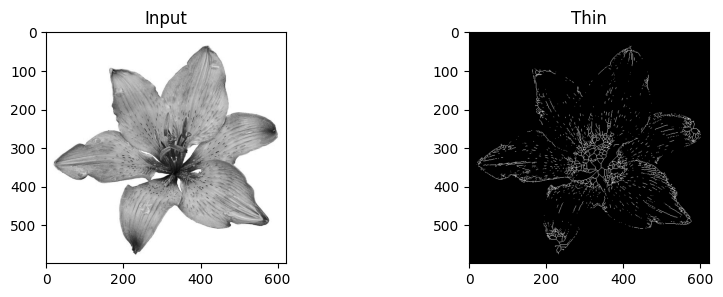

In [42]:
from skimage import img_as_float
from skimage import color, morphology
import matplotlib.pyplot as plt

image = img_as_float(color.rgb2gray(io.imread('/content/drive/MyDrive/PCVK/images/lily.jpg')))

image_binary = image < 0.5
out_skeletonize = morphology.skeletonize(image_binary)
out_thin = morphology.thin(image_binary)
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 3))

ax0.imshow(image, cmap='gray')
ax0.set_title('Input')

ax1.imshow(out_thin, cmap='gray')
ax1.set_title('Thin')

plt.savefig('/content/drive/MyDrive/PCVK/images/lily.jpg')
plt.show()

**TUGAS WEEK 09**

Morfologi melibatkan implementasi dataset KTP yang terdapat dalam
Modul 7. Dalam tugas ini, kita akan menggunakan semua informasi yang disediakan dalam
modul Morfologi dan menerapkan sejumlah nilai tambahan dalam kode sumber. Tujuannya
adalah agar citra KTP dapat terbaca dengan baik ketika teknik morfologi diterapkan pada citra
tersebut.



1.   *Dilasi*




[[1]
 [1]]


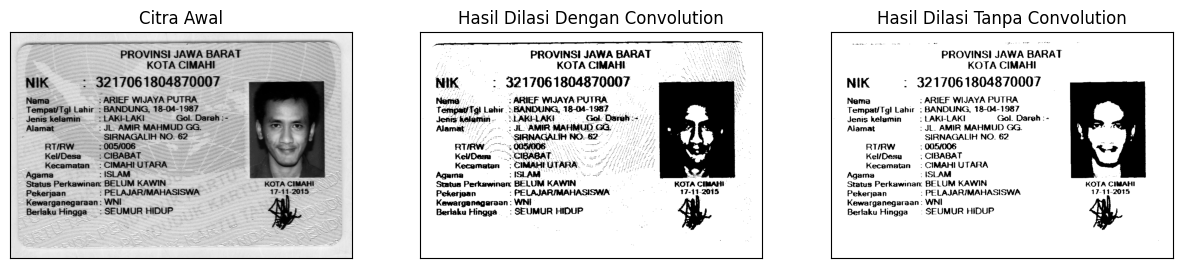

In [45]:
def conv2d(image, kernel, stride):

  height, width = image.shape[0], image.shape[1]
  kernel_height, kernel_width = kernel.shape[0], kernel.shape[1]

  start = int(kernel_width/2)

  image_result = np.copy(image)

  for y in range(start, height - start, stride):
    for x in range(start, width - start, stride):
      value = 0

      for ky in range(kernel_height):
        for kx in range(kernel_width):
          i = y - start + ky
          j = x - start + kx

          value += image[i, j] * kernel[ky, kx]

      image_result[y, x] = np.clip(value, 0, 255)

    return image_result

def Brightness (image, brightness):
  brightness_image = np.zeros(image.shape, image.dtype)

  for y in range(image.shape[0]):
    for x in range(image.shape[1]):
      for c in range(image.shape[2]):
        brightness_image[y,x,c] = np.clip(image[y,x,c] + brightness, 0, 255)

  return brightness_image

kernel_sharpen = np.array([[0, -1, 0],
                          [-1, 5, -1],
                          [0, -1, 0]], dtype = np.float32)

img = cv.imread('/content/drive/MyDrive/PCVK/ktp3.png')

kernel_lsed = np.array([[1, 0, -1],
                          [2, 0, -3],
                          [1, 0, -2]], dtype=np.float32)

# cv2_imshow
result = conv2d(img, kernel_lsed,1)
brightness = Brightness(result, -35)

input = cv.cvtColor(brightness, cv.COLOR_BGR2GRAY)

ret, thresh = cv.threshold(input, 127, 255, cv.THRESH_BINARY)
kernel = np.ones((2,1),np.uint16)
dilasi = cv.dilate(thresh,kernel,iterations = 1)


input2 = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

ret2, thresh2 = cv.threshold(input2, 127, 255, cv.THRESH_BINARY)
kernel2 = np.ones((2,1),np.uint16)
dilasi2 = cv.dilate(thresh2,kernel2,iterations = 1)

print(kernel)
plt.figure(figsize=(15,13))
plt.subplot(131),plt.imshow(input, cmap='gray'),plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(dilasi, cmap='gray'),plt.title('Hasil Dilasi Dengan Convolution')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(dilasi2, cmap='gray'),plt.title('Hasil Dilasi Tanpa Convolution')
plt.xticks([]), plt.yticks([])
plt.show()


2.   *Closing*



In [47]:
def convert_to_binary(image):
    # Konversi gambar ke dalam citra grayscale
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

    # Terapkan fungsi thresholding dengan flag THRESH_OTSU
    _, binary = cv.threshold(gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

    return binary

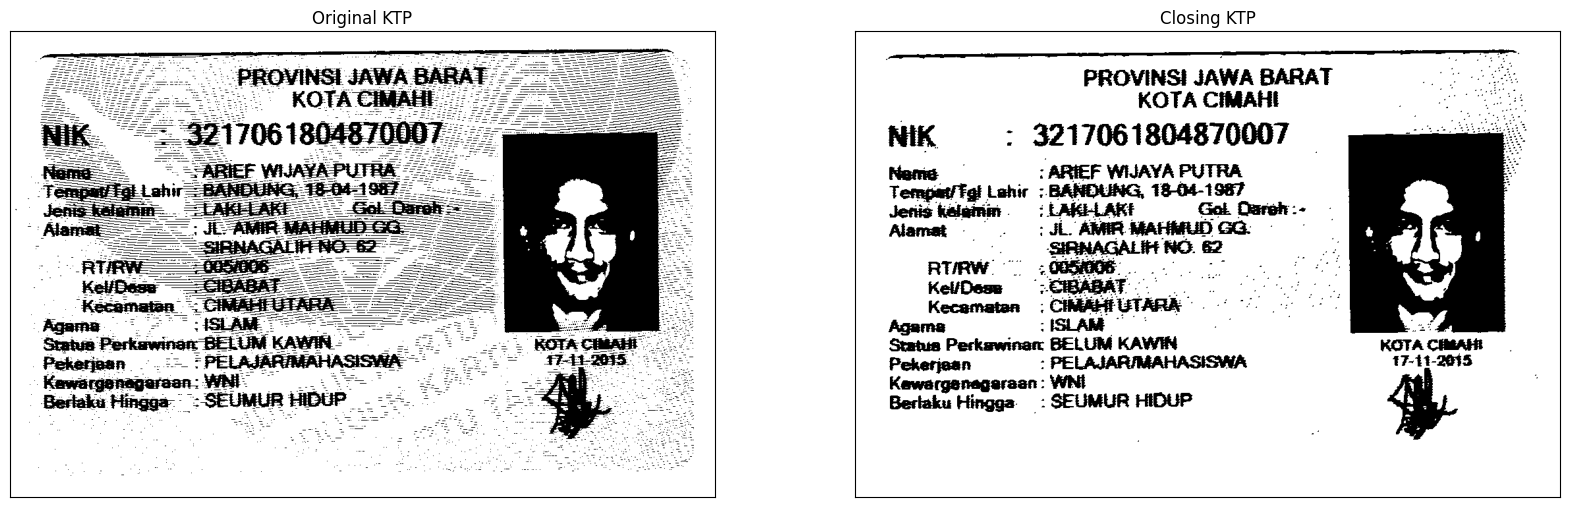

In [54]:
# Membaca citra KTP
ktp_image = cv.imread('/content/drive/MyDrive/PCVK/ktp3.png')

# Ubah ke binary
ktp_image = convert_to_binary(ktp_image)

# Closing
kernel = np.array([[1, 1],
                              [1, 0]], dtype = np.uint8)
closs = cv.morphologyEx(ktp_image,cv.MORPH_CLOSE, kernel)

# Menampilkan citra KTP
plt.figure(figsize=(20,20))

plt.subplot(121),plt.imshow(X=ktp_image, cmap = 'gray')
plt.title('Original KTP'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(X=closs,cmap = 'gray')
plt.title('Closing KTP'), plt.xticks([]), plt.yticks([])

plt.show()




3. *Black Hat dan Top Hat*



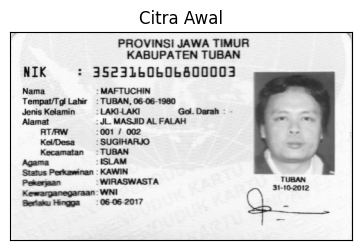

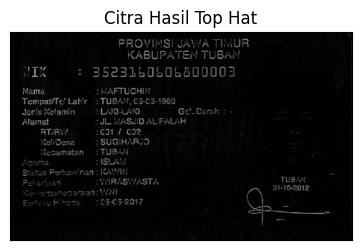

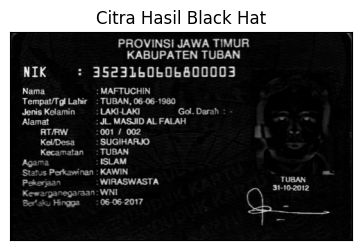

In [61]:
filterSize =(3, 3)
kernel = cv.getStructuringElement(cv.MORPH_RECT, filterSize)

# Reading the image named 'input.jpg'
img = cv.imread('/content/drive/MyDrive/PCVK/ktp4.png')
input_image = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

img2 = cv.imread('/content/drive/MyDrive/PCVK/ktp4.png')
input_image2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

# Applying the Black-Hat operation
tophat_img = cv.morphologyEx(img,cv.MORPH_BLACKHAT, kernel)

Kernel = cv.getStructuringElement(cv.MORPH_RECT, (13, 5))
blackhat_img = cv.morphologyEx(input_image2, cv.MORPH_BLACKHAT, Kernel)
#cv2.imshow("original", input_image)
#cv2.imshow("tophat", tophat_img)
#cv2.waitKey(5000)

plt.figure(figsize=(15,10)),plt.subplot(132),plt.imshow(input_image,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.figure(figsize=(15,10)),plt.subplot(132),plt.imshow(tophat_img,cmap = 'gray')
plt.title('Citra Hasil Top Hat'), plt.xticks([]), plt.yticks([])
plt.figure(figsize=(15,10)),plt.subplot(132),plt.imshow(blackhat_img,cmap = 'gray')
plt.title('Citra Hasil Black Hat'), plt.xticks([]), plt.yticks([])
plt.show()

4. *Erosi*

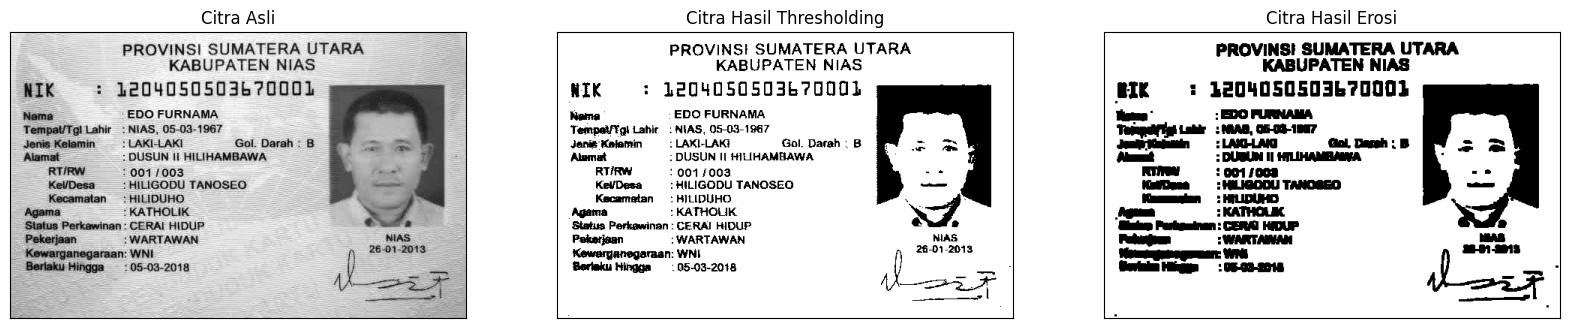

In [62]:
# Membaca citra
img = cv.imread('/content/drive/MyDrive/PCVK/ktp5.png', 0)

# Melakukan thresholding
ret, thresh = cv.threshold(img, 127, 255, cv.THRESH_BINARY)

kernel = np.ones((3, 3), np.uint8)
eroded = cv.erode(thresh, kernel, iterations=1)

plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1), plt.imshow(img, cmap='gray')
plt.title('Citra Asli'), plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 2), plt.imshow(thresh, cmap='gray')
plt.title('Citra Hasil Thresholding'), plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 3), plt.imshow(eroded, cmap='gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])

plt.show()



5. *Opening*



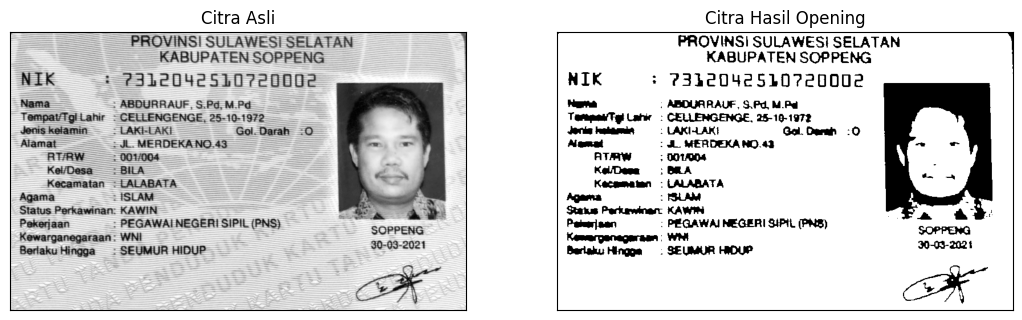

In [63]:
image_path = '/content/drive/MyDrive/PCVK/ktp.jpg'
image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

ret, threshold = cv.threshold(image, 127, 255, cv.THRESH_BINARY)
kernel = np.ones((3,3), np.uint8)
image_opening = cv.morphologyEx(threshold, cv.MORPH_OPEN, kernel)

plt.figure(figsize=(20, 16))
plt.subplot(131), plt.imshow(image, cmap='gray')
plt.title('Citra Asli'), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(image_opening, cmap='gray')
plt.title('Citra Hasil Opening'), plt.xticks([]), plt.yticks([])

plt.show()



6. *Tichkening*



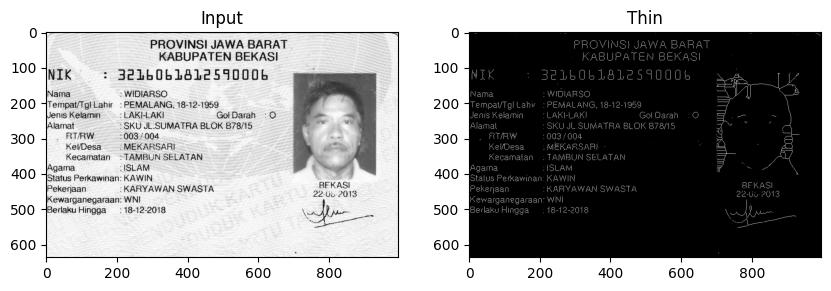

In [64]:
image = img_as_float(color.rgb2gray(io.imread('/content/drive/MyDrive/PCVK/ktp6.png')))

image_binary = image < 0.5
out_skeletonize = morphology.skeletonize(image_binary)
out_thin = morphology.thin(image_binary)
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 3))

ax0.imshow(image, cmap='gray')
ax0.set_title('Input')

ax1.imshow(out_thin, cmap='gray')
ax1.set_title('Thin')

plt.savefig('/content/drive/MyDrive/PCVK/ktp6.png')
plt.show()